In [ ]:
import pandas as pd


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Accumen challenge/25-03-2021-TO-24-03-2023TATAMOTORSALLN.csv",
                   parse_dates=['Date'],
                   index_col=['Date'])

In [ ]:
data.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2021-03-25,TATAMOTORS,EQ,294.45,294.00,294.00,282.25,286.00,285.55,287.04,84528317,2.426271e+10,511962,8894303,10.52
2021-03-26,TATAMOTORS,EQ,285.55,290.50,301.40,290.50,296.75,296.40,296.40,80924011,2.398553e+10,434783,7121742,8.80
2021-03-30,TATAMOTORS,EQ,296.40,300.50,301.30,292.70,297.05,297.05,296.64,45257627,1.342533e+10,267495,5114972,11.30
2021-03-31,TATAMOTORS,EQ,297.05,299.00,307.50,297.50,301.45,301.80,303.68,58569012,1.778640e+10,325482,7088954,12.10
2021-04-01,TATAMOTORS,EQ,301.80,306.75,309.85,303.05,307.25,307.75,306.29,44088352,1.350382e+10,268091,4813315,10.92


In [ ]:
close_price = data['Close Price']

In [ ]:
stock_price = pd.DataFrame(data["Close Price"]).rename(columns={"Close Price": "Price"})
stock_price.head()

,Price
Date,
2021-03-25,285.55
2021-03-26,296.40
2021-03-30,297.05
2021-03-31,301.80
2021-04-01,307.75


Text(0.5, 1.0, 'Tata Motors')

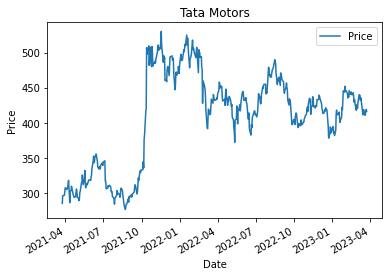

In [ ]:
import matplotlib.pyplot as plt

stock_price.plot()
plt.ylabel("Price")
plt.title("Tata Motors")

In [ ]:
timesteps = stock_price.index.to_numpy()
prices = stock_price["Price"].to_numpy()

prices

array([285.55, 296.4 , 297.05, 301.8 , 307.75, 305.05, 307.75, 307.8 ,
       313.95, 318.2 , 286.55, 302.85, 303.5 , 310.  , 301.4 , 298.05,
       294.55, 294.  , 295.4 , 301.5 , 305.9 , 301.9 , 293.85, 293.  ,
       289.45, 291.5 , 301.25, 302.75, 314.85, 315.55, 326.  , 312.25,
       321.1 , 332.45, 314.45, 307.7 , 313.4 , 313.1 , 311.85, 315.25,
       315.5 , 318.6 , 318.75, 318.75, 318.1 , 323.  , 325.65, 334.95,
       345.5 , 352.75, 343.35, 344.75, 350.75, 355.95, 352.7 , 349.35,
       345.65, 337.4 , 334.3 , 337.9 , 335.25, 334.65, 339.65, 342.8 ,
       341.55, 339.6 , 344.25, 344.9 , 346.1 , 316.9 , 317.1 , 306.35,
       306.3 , 307.45, 310.95, 309.55, 310.25, 311.25, 308.85, 302.15,
       302.55, 295.55, 293.15, 291.4 , 284.45, 292.9 , 293.95, 296.85,
       303.7 , 298.15, 299.7 , 300.05, 298.1 , 294.2 , 295.45, 306.  ,
       307.25, 303.7 , 297.7 , 293.35, 283.1 , 276.95, 279.8 , 284.4 ,
       284.3 , 285.75, 291.95, 287.3 , 295.25, 293.15, 295.55, 297.45,
      

In [ ]:
split_size = int(0.8 * len(stock_price))
# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(404, 102, 404, 102)

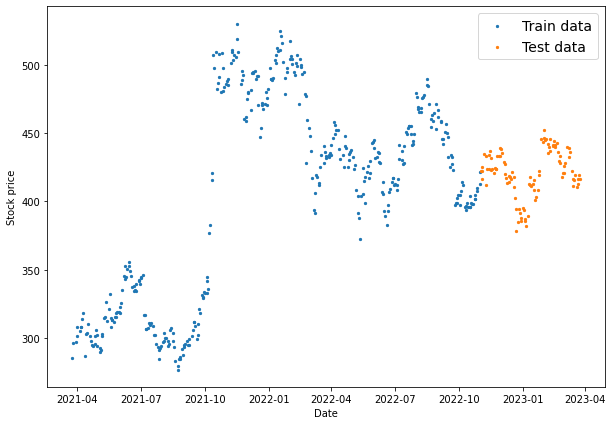

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("Stock price")
plt.legend(fontsize=14)
plt.show();

In [ ]:
import numpy as np

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 40, random_state = 0)


In [ ]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7

In [ ]:
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(499, 499)

In [ ]:
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [285.55 296.4  297.05 301.8  307.75 305.05 307.75] -> Label: [307.8]
Window: [296.4  297.05 301.8  307.75 305.05 307.75 307.8 ] -> Label: [313.95]
Window: [297.05 301.8  307.75 305.05 307.75 307.8  313.95] -> Label: [318.2]


In [ ]:
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(399, 100, 399, 100)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[285.55, 296.4 , 297.05, 301.8 , 307.75, 305.05, 307.75],
        [296.4 , 297.05, 301.8 , 307.75, 305.05, 307.75, 307.8 ],
        [297.05, 301.8 , 307.75, 305.05, 307.75, 307.8 , 313.95],
        [301.8 , 307.75, 305.05, 307.75, 307.8 , 313.95, 318.2 ],
        [307.75, 305.05, 307.75, 307.8 , 313.95, 318.2 , 286.55]]),
 array([[307.8 ],
        [313.95],
        [318.2 ],
        [286.55],
        [302.85]]))

In [ ]:
regressor.fit(train_windows, train_labels)

<ipython-input-106-4558128dafb5>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_windows, train_labels)


RandomForestRegressor(n_estimators=40, random_state=0)

In [ ]:
predictions = regressor.predict(test_windows)
len(test_windows)

100

In [ ]:
predictions


array([423.133 , 417.441 , 431.82  , 432.834 , 436.007 , 407.4605,
       421.    , 421.5325, 431.915 , 433.4315, 432.896 , 417.439 ,
       421.625 , 419.2095, 427.8115, 420.309 , 423.6735, 432.0805,
       436.446 , 434.3935, 435.746 , 432.9905, 431.6645, 432.182 ,
       423.3445, 408.881 , 407.8945, 404.828 , 412.7665, 419.2185,
       419.8   , 419.765 , 426.645 , 418.455 , 413.2345, 399.029 ,
       397.4625, 392.1165, 392.925 , 397.751 , 399.754 , 395.6   ,
       398.4965, 403.453 , 404.706 , 396.772 , 396.7345, 399.137 ,
       399.6675, 418.201 , 416.4895, 407.0705, 416.012 , 420.7825,
       419.515 , 412.631 , 399.0455, 401.665 , 413.19  , 419.971 ,
       411.167 , 439.7245, 439.4935, 451.2345, 447.165 , 444.6335,
       445.165 , 446.4645, 431.4875, 442.9765, 429.4395, 447.182 ,
       446.8165, 445.459 , 447.4205, 447.481 , 443.777 , 446.7595,
       430.69  , 430.8485, 428.419 , 436.762 , 406.0025, 413.24  ,
       425.4865, 424.9105, 432.6045, 440.2575, 434.4115, 429.2

In [ ]:
from sklearn.tree import export_graphviz
len(y_test)
y_test

array([422.15, 422.15, 416.25, 425.35, 435.  , 433.15, 412.2 , 423.5 ,
       423.5 , 433.7 , 437.15, 431.55, 423.15, 423.8 , 421.1 , 424.7 ,
       424.05, 423.4 , 433.2 , 433.25, 433.15, 439.4 , 438.25, 435.4 ,
       428.75, 427.1 , 420.1 , 417.2 , 413.3 , 414.15, 418.5 , 417.9 ,
       416.7 , 421.6 , 418.  , 410.5 , 402.6 , 394.45, 378.35, 384.8 ,
       394.15, 391.3 , 385.9 , 387.95, 394.8 , 393.9 , 385.6 , 386.9 ,
       382.  , 389.45, 412.9 , 418.2 , 412.25, 411.5 , 413.  , 415.3 ,
       408.4 , 400.75, 403.15, 408.4 , 422.15, 419.05, 445.6 , 443.65,
       452.1 , 446.65, 444.8 , 445.45, 442.  , 435.45, 440.1 , 436.75,
       445.85, 441.05, 440.55, 444.15, 441.6 , 439.9 , 443.  , 436.5 ,
       429.45, 433.2 , 427.75, 417.95, 420.7 , 426.  , 420.45, 428.  ,
       440.1 , 439.3 , 432.2 , 435.85, 422.4 , 416.65, 411.35, 415.7 ,
       419.  , 410.75, 412.55, 416.1 , 419.15, 416.5 ])

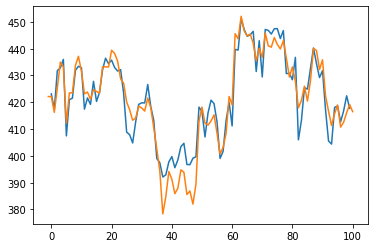

In [ ]:
plt.plot(range(0,100),predictions, label = "Predicted Data")
plt.plot(range(-1,101), y_test, label="Test data")